In [2]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import matplotlib as mpl
import datetime
import seaborn as sns

In [4]:
df = pd.read_pickle('./data_final.pkl') #importing cleaned data from the other file

In [5]:
df_day = df.groupby(by = ['Station','Date']).sum()

In [6]:
df_day = df_day.reset_index()

In [7]:
df_day['Day_of_week'] = df_day.Date.apply(lambda x: x.weekday())

In [8]:
df_day['is_weekday'] = df_day.Day_of_week.apply(lambda x: np.where(x < 5, True, False))

In [9]:
weekdays = {0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
df_day.head()

,Station,Date,Exit_diff,Entry_diff,Net_Flow,Day_of_week,is_weekday
0,1 AV,2018-12-29,15430.0,12071.0,27501.0,5,False
1,1 AV,2018-12-30,14775.0,11989.0,26764.0,6,False
2,1 AV,2018-12-31,18246.0,14786.0,33032.0,0,True
3,1 AV,2019-01-01,12097.0,9989.0,22086.0,1,True
4,1 AV,2019-01-02,21058.0,18476.0,39534.0,2,True


In [10]:
week_day_data = pd.DataFrame(df_day[df_day.is_weekday == True])

In [11]:
week_end_data = pd.DataFrame(df_day[df_day.is_weekday == False])

In [12]:
week_day_data_summary = week_day_data.groupby( by = ['Station']).sum()

In [13]:
NFby_station_weekday = week_day_data_summary.Net_Flow.sort_values(ascending = False).rename('weekday')

In [14]:
top_ten = NFby_station_weekday.index[:10].tolist()

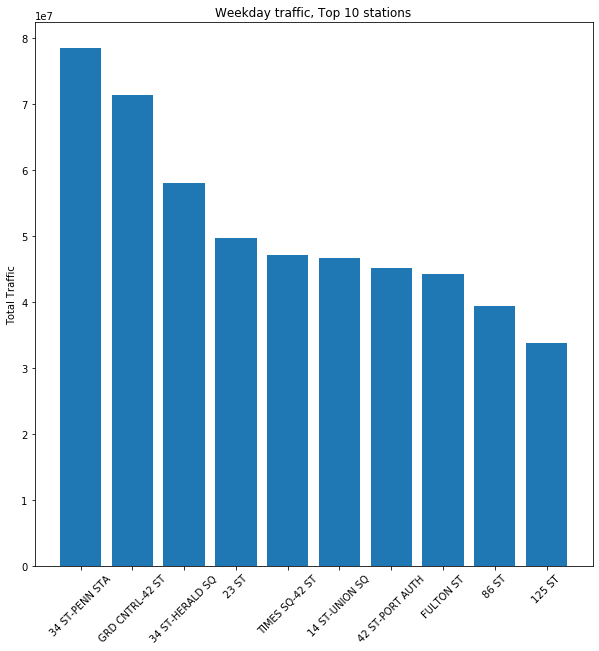

In [15]:
plot_length = 10

plt.figure(figsize=[10,10])
plt.bar(x = NFby_station_weekday.index[:plot_length],height = NFby_station_weekday[:plot_length])
plt.xticks(np.arange(plot_length),NFby_station_weekday.index[:plot_length],rotation=45)

plt.ylabel('Total Traffic')
plt.title('Weekday traffic, Top {} stations'.format(plot_length))

plt.savefig('graph_top_stations_weekday.png')

In [16]:
week_end_data_summary = week_end_data.groupby( by = ['Station']).sum()

In [17]:
NFby_station_weekend = week_end_data_summary.Net_Flow.sort_values(ascending = False).rename('weekend')

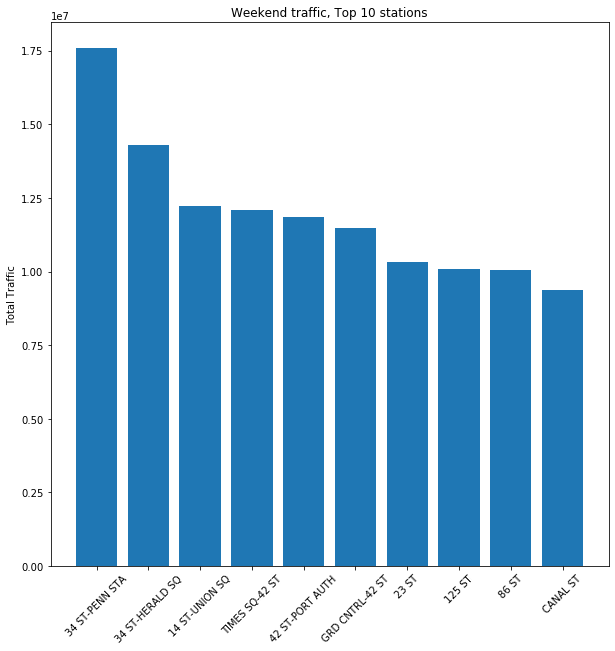

In [18]:
plot_length = 10

plt.figure(figsize=[10,10])
plt.bar(x = NFby_station_weekend.index[:plot_length],height = NFby_station_weekend[:plot_length])
plt.xticks(np.arange(plot_length),NFby_station_weekend.index[:plot_length],rotation=45)

plt.ylabel('Total Traffic')
plt.title('Weekend traffic, Top {} stations'.format(plot_length))

plt.savefig('graph_top_stations_weekend.png')

In [19]:
week_info = pd.DataFrame([NFby_station_weekday,NFby_station_weekend]).transpose()

In [20]:
week_info['weekday_weekend_ratio'] = week_info.weekday*2/(5*week_info.weekend)

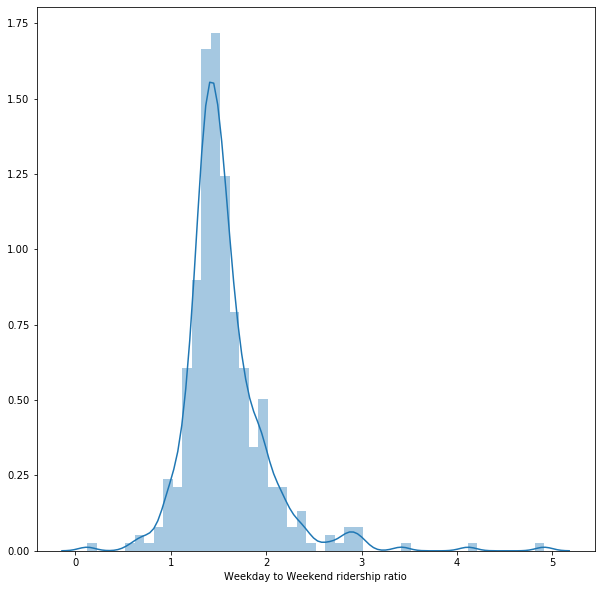

In [21]:
plt.figure(figsize=[10,10])
sns.distplot(week_info.weekday_weekend_ratio, label = 'Weekday to Weekend ridership ratio')
plt.xlabel('Weekday to Weekend ridership ratio')
plt.savefig('weekday to weekend ridership.png')

In [22]:
week_info['tourist_flag'] = np.where(abs(week_info.weekday_weekend_ratio-1) < 0.05 , True, False )

In [23]:
week_info[week_info.tourist_flag == True] # the stations selected are tourists stations.

,weekday,weekend,weekday_weekend_ratio,tourist_flag
CONEY IS-STILLW,6074873.0,2470846.0,0.983448,True
METROPOLITAN AV,5217522.0,2109850.0,0.989174,True
JFK JAMAICA CT1,4790072.0,1847814.0,1.036916,True
BROADWAY JCT,3928093.0,1530937.0,1.026324,True
HOWARD BCH JFK,2128900.0,839967.0,1.013802,True
BOWERY,1767008.0,739975.0,0.955172,True
LAFAYETTE AV,1653855.0,650372.0,1.017175,True
SENECA AVE,1549479.0,605172.0,1.024158,True
HEWES ST,1425132.0,586549.0,0.971876,True
ROCKAWAY PARK B,368357.0,151224.0,0.974335,True


We will focus the exploration now on the top 10 stations only.
First, we would like to know how busy it is during weekdays v.s. weekends

In [24]:
week_day_data_dayofweek = df_day.groupby( by = ['Station','Day_of_week']).mean().reset_index()

In [25]:
week_top_ten = week_day_data_dayofweek[week_day_data_dayofweek.Station.isin(top_ten)]

In [26]:
week_top_ten_s = pd.crosstab(week_top_ten.Day_of_week,week_top_ten.Station,week_top_ten.Net_Flow,aggfunc = np.mean).reset_index()

In [27]:
week_top_ten_s.Day_of_week.replace(weekdays,inplace = True)

In [28]:
weekdays_list = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

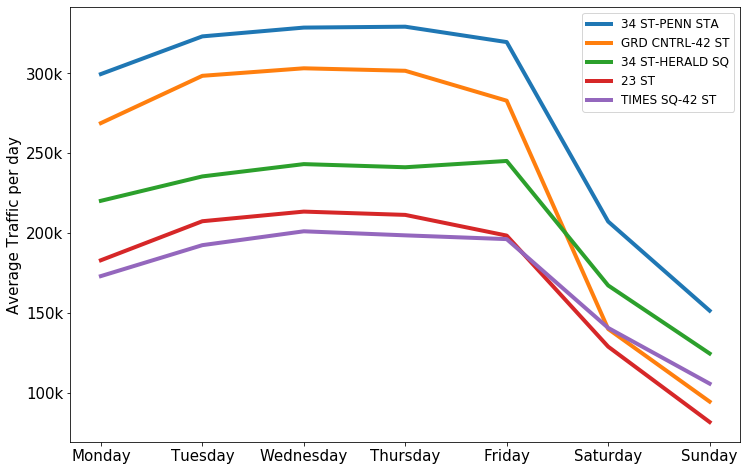

In [29]:
plt.figure(figsize=[12,8])
top_five = top_ten[:5]
yticks = [100000,150000,200000,250000,300000]

for sta in top_five:
    plt.plot(week_top_ten_s.Day_of_week, week_top_ten_s[sta],label = sta,linewidth = 4)
    
plt.xticks(range(7),weekdays_list,fontsize =15)
plt.ylabel('Average Traffic per day',fontsize = 15)
plt.yticks(yticks,['100k','150k','200k','250k','300k'],fontsize = 15)
plt.legend(fontsize = 12)
plt.savefig('top5station_daily_avg.png')

The top five stations are all very populous during weekdays than weekends. We will then focus on weekdays and try to understand how it differs by period of day.

In [142]:
time_groups = [6,12,16,20]
time_points = []
for time in time_groups:
    time_points.append(datetime.datetime(year=1900,month=1,day=1,hour=time, minute=0, second=0))

time_points.append(datetime.datetime(year=1900,month=1,day=2,hour=0, minute=0, second=0))
    
def group_time(time):
    if time_points[0]<= time < time_points[1]:
        return 0
    if time_points[1] <= time < time_points[2]:
        return 1
    if time_points[2] <= time < time_points[3]:
        return 2
    if time_points[3] <= time <= time_points[4]:
        return 3
    pass

time_of_day = ['Morning','Noon','Afternoon','Evening']
time_of_day_dict = {0:'Morning',1:'Noon',2:'Afternoon',3:'Evening'}

In [44]:
df.Time = df.Time.astype(str).apply(lambda x: datetime.datetime.strptime(x, '%H:%M:%S'))

ValueError: time data '1900-01-01 00:00:00' does not match format '%H:%M:%S'

In [143]:
df['Time_of_day'] = df.Time.apply(lambda x: group_time(x))

In [46]:
df['Day_of_week'] = df.Date.apply(lambda x: x.weekday())
df['is_weekday'] = df.Day_of_week.apply(lambda x: np.where(x < 5, True, False))

In [75]:
df.sample(14)

,Turnstile_ID,Station,Date,Time,Exit_diff,Entry_diff,Net_Flow,Time_of_day,Day_of_week,is_weekday
1403532,R033_00-00-00_TIMES SQ-42 ST,TIMES SQ-42 ST,2019-11-13,1900-01-01 03:00:00,45.0,194.0,239.0,None,2,True
9963831,R544_00-04-04_HARRISON,HARRISON,2019-12-26,1900-01-01 03:14:11,63.0,0.0,63.0,None,3,True
3451155,R110_02-05-02_FLATBUSH AV-B.C,FLATBUSH AV-B.C,2019-03-17,1900-01-01 21:00:00,140.0,4.0,144.0,3,6,False
2204280,R057_00-03-03_ATL AV-BARCLAY,ATL AV-BARCLAY,2019-09-24,1900-01-01 00:00:00,31.0,112.0,143.0,None,1,True
9003211,R413_00-00-01_KNICKERBOCKER,KNICKERBOCKER,2019-03-08,1900-01-01 20:00:00,431.0,123.0,554.0,3,4,True
7868612,R324_00-00-02_116 ST,116 ST,2019-11-22,1900-01-01 12:00:00,201.0,201.0,402.0,1,4,True
5989903,R213_00-00-01_BAY RIDGE AV,BAY RIDGE AV,2019-09-15,1900-01-01 08:00:00,6.0,36.0,42.0,0,6,False
9487604,R460_00-03-02_MARCY AV,MARCY AV,2019-06-26,1900-01-01 05:00:00,14.0,6.0,20.0,None,2,True
10264805,R550_01-01-06_LACKAWANNA,LACKAWANNA,2019-11-17,1900-01-01 16:02:46,19.0,70.0,89.0,2,6,False
36897,R001_02-00-01_SOUTH FERRY,SOUTH FERRY,2019-11-15,1900-01-01 12:00:00,237.0,399.0,636.0,1,4,True


In [144]:
week_day_data = pd.DataFrame(df[df.is_weekday == True])

In [77]:
week_day_data.sample(10)

,Turnstile_ID,Station,Date,Time,Exit_diff,Entry_diff,Net_Flow,Time_of_day,Day_of_week,is_weekday
1296345,R030_00-06-00_CHAMBERS ST,CHAMBERS ST,2019-05-14,1900-01-01 12:00:00,731.0,164.0,895.0,1,1,True
4243637,R141_00-03-00_FOREST HILLS 71,FOREST HILLS 71,2019-02-01,1900-01-01 12:00:00,18.0,692.0,710.0,1,4,True
294675,R012_03-00-00_34 ST-PENN STA,34 ST-PENN STA,2019-03-21,1900-01-01 04:00:00,0.0,1.0,1.0,None,3,True
1801260,R046_00-00-07_GRD CNTRL-42 ST,GRD CNTRL-42 ST,2019-06-13,1900-01-01 20:00:00,542.0,122.0,664.0,3,3,True
2060468,R052_00-00-04_WOODLAWN,WOODLAWN,2019-07-29,1900-01-01 12:00:00,22.0,340.0,362.0,1,0,True
9490619,R460_00-05-00_MARCY AV,MARCY AV,2019-11-07,1900-01-01 16:00:00,0.0,0.0,0.0,2,3,True
2901082,R088_00-02-00_CORTLANDT ST,CORTLANDT ST,2019-07-18,1900-01-01 05:00:00,1.0,0.0,1.0,None,3,True
7640797,R306_00-06-02_238 ST,238 ST,2019-09-13,1900-01-01 05:00:00,0.0,0.0,0.0,None,4,True
5696805,R197_00-00-05_36 ST,36 ST,2019-05-30,1900-01-01 13:00:00,126.0,639.0,765.0,1,3,True
10391931,R570_01-00-03_72 ST-2 AVE,72 ST-2 AVE,2019-01-23,1900-01-01 20:00:00,344.0,763.0,1107.0,3,2,True


In [145]:
week_day_by_period = week_day_data.groupby(by = ['Station','Date','Time_of_day']).sum().reset_index()

In [146]:
weekday_topten = week_day_by_period[week_day_by_period.Station.isin(top_ten)]
weekday_bytime_agg = pd.crosstab(weekday_topten.Time_of_day,weekday_topten.Station,weekday_topten.Net_Flow,aggfunc = np.mean).reset_index()

In [147]:
weekday_bytime_agg.set_index('Time_of_day')
weekday_bytime_agg.index.rename('',inplace=True)

In [148]:
weekday_bytime_agg.drop(columns = 'Time_of_day',inplace=True)

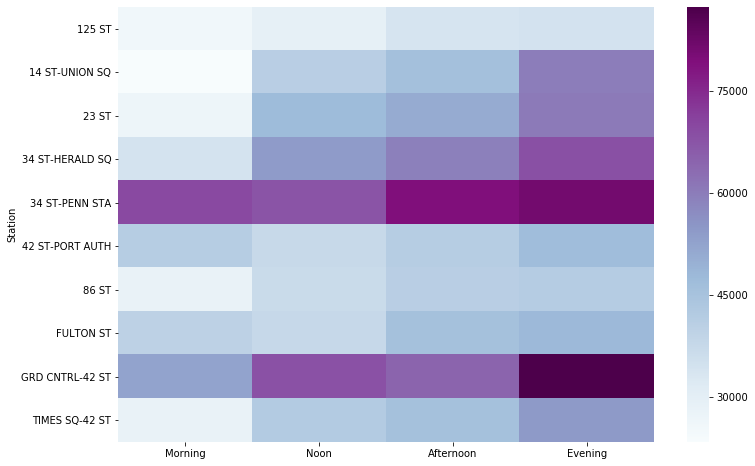

In [150]:
plt.figure(figsize=[12,8])
sns.heatmap(weekday_bytime_agg.transpose(),xticklabels = time_of_day,cmap = "BuPu")
plt.savefig('top10_sta_heatmap.png')